In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [444]:
data = pd.read_csv('data.csv')

In [445]:
data

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,...,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,...,25535,2%,Divorced,West,Issues with the Manager,NaN,NaN,NaN,NaN,NaN
1,2,XYZ2490,ABC2,5-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,6-Apr-12,1. 9,...,52155,45%,Single,South,More Challenging Job Roles/ Higher designation,NaN,NaN,NaN,NaN,NaN
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,7-Apr-12,1. 5,...,26438,18%,Divorced,CENTRAL,Issues with the Manager,NaN,NaN,NaN,NaN,NaN
3,4,XYZ1679,ABC4,01-May-08,AM - Sales,M1,Yes,Admin Gujarat,03-Apr-12,3 .11,...,54311,82%,Single,West,Lack of Growth,NaN,NaN,NaN,NaN,NaN
4,5,XYZ2378,ABC5,03-Mar-10,Sales Executive,E1,Yes,Jagdishpuram,10-Apr-12,2 .1,...,26702,49%,Divorced,North,Issues with the Manager,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,323,XYZ1538,ABC323,26-May-08,AM - Sales,M1,Yes,Guntur,15-Mar-13,4 .9,...,53841,69%,Divorced,South,Lack of Growth,NaN,NaN,NaN,NaN,NaN
323,324,XYZ3221,ABC324,13-Sep-12,Sales Executive,E1,Yes,Guntur,07-Mar-13,0. 5,...,25813,11%,Married,South,Lack of Growth,NaN,NaN,NaN,NaN,NaN
324,325,XYZ0207,ABC325,12-Dec-05,Sr Sales Executive,E2,Yes,Guntur,12-Mar-13,7 .3,...,36498,11%,Divorced,South,Lack of Growth,NaN,NaN,NaN,NaN,NaN
325,326,XYZ0183,ABC326,21-Jul-04,AM - Sales,M1,Yes,Guntur,31-Mar-13,8 .8,...,51796,82%,Divorced,South,Termination - Poor Performance,NaN,NaN,NaN,NaN,NaN


In [446]:
for i,item in enumerate(data.Tenure):
    data.Tenure[i] = float(item.replace(' ',''))

C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [447]:
for i,item in enumerate(data['Engagement Score (% Satisfaction)']):
    data['Engagement Score (% Satisfaction)'][i] = float(item.strip('%') )

C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [448]:
data = data.drop(columns=['S.No'])

In [449]:
data=data.iloc[:,:18]

In [450]:
a=data.loc[:,['Education','Monthly Income']]

In [451]:
a=a.groupby('Education').mean()

In [452]:
a

,Monthly Income
Education,
Bachelors,30560.954693
MBA,67475.500000


In [453]:
a.index

Index(['Bachelors', 'MBA'], dtype='object', name='Education')

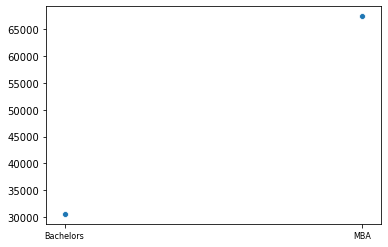

In [454]:
sns.scatterplot(a.index.tolist(),a.iloc[:,0].tolist())

In [455]:
len(data.index[data.Education=='Bachelors'])

309

In [456]:
dic={}
for i,item in enumerate(data.Remarks.unique()):
    dic[item]=i

In [457]:
data['remarks']=np.nan
for i,item in enumerate(data.Remarks):
    data.remarks[i]=dic[item]

C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [458]:
data

,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks,remarks
0,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1.6,Female,Bachelors,27,4,25535,2,Divorced,West,Issues with the Manager,0.0
1,XYZ2490,ABC2,5-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,6-Apr-12,1.9,Male,MBA,36,2,52155,45,Single,South,More Challenging Job Roles/ Higher designation,1.0
2,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,7-Apr-12,1.5,Male,Bachelors,24,4,26438,18,Divorced,CENTRAL,Issues with the Manager,0.0
3,XYZ1679,ABC4,01-May-08,AM - Sales,M1,Yes,Admin Gujarat,03-Apr-12,3.11,Male,Bachelors,33,2,54311,82,Single,West,Lack of Growth,2.0
4,XYZ2378,ABC5,03-Mar-10,Sales Executive,E1,Yes,Jagdishpuram,10-Apr-12,2.1,Male,Bachelors,24,4,26702,49,Divorced,North,Issues with the Manager,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,XYZ1538,ABC323,26-May-08,AM - Sales,M1,Yes,Guntur,15-Mar-13,4.9,Male,Bachelors,37,2,53841,69,Divorced,South,Lack of Growth,2.0
323,XYZ3221,ABC324,13-Sep-12,Sales Executive,E1,Yes,Guntur,07-Mar-13,0.5,Male,Bachelors,25,3,25813,11,Married,South,Lack of Growth,2.0
324,XYZ0207,ABC325,12-Dec-05,Sr Sales Executive,E2,Yes,Guntur,12-Mar-13,7.3,Male,Bachelors,28,1,36498,11,Divorced,South,Lack of Growth,2.0
325,XYZ0183,ABC326,21-Jul-04,AM - Sales,M1,Yes,Guntur,31-Mar-13,8.8,Male,Bachelors,36,3,51796,82,Divorced,South,Termination - Poor Performance,9.0


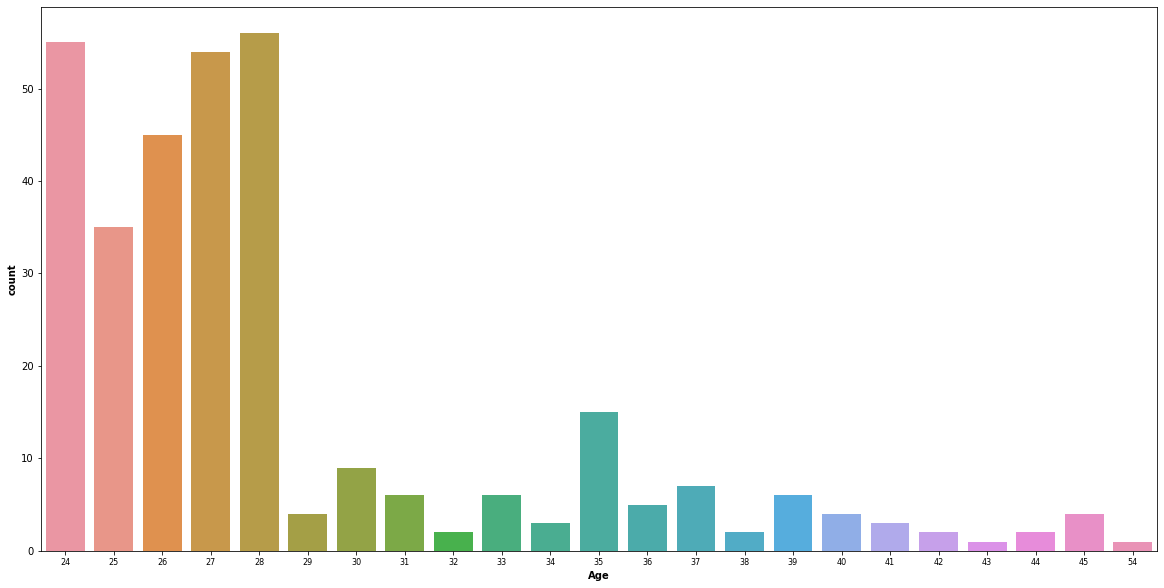

In [459]:
plt.figure(figsize=(20,10))
sns.countplot(data.Age)

In [460]:
data.Age.mean()

28.541284403669724

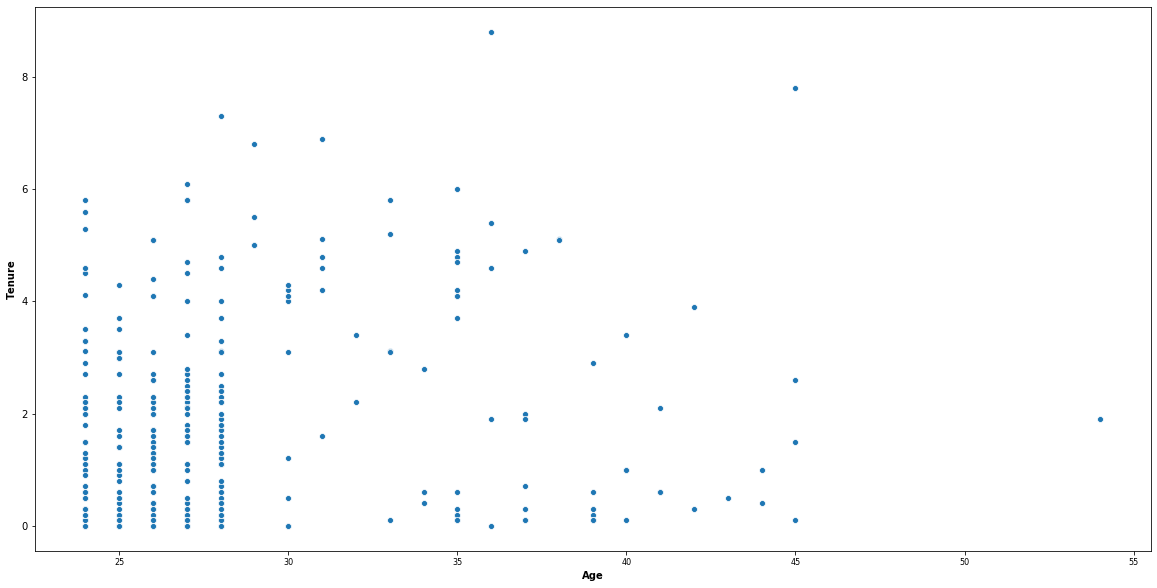

In [461]:
plt.figure(figsize=(20,10))
sns.scatterplot(data.Age,data.Tenure)

In [462]:
data.Tenure.mean()

1.821957186544345

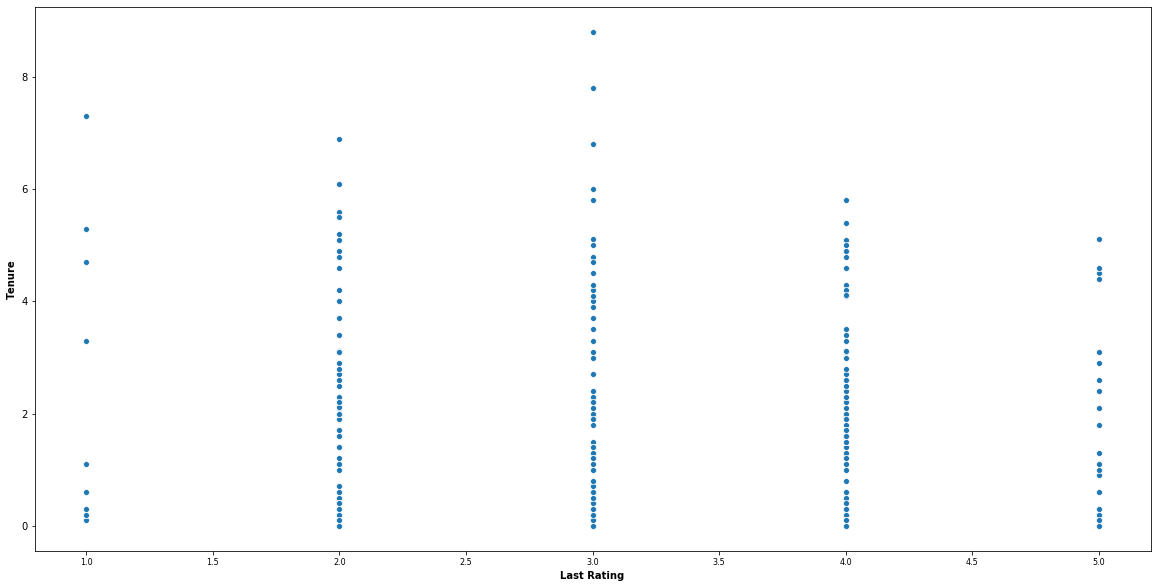

In [463]:
plt.figure(figsize=(20,10))
sns.scatterplot(data['Last Rating'],data['Tenure'])

In [464]:
s=[]
for p in data['Tenure']:
    if(p<=1):s.append('<1')
    elif(p>1 and p<=3):s.append('1-3')
    else:s.append('>3')

In [465]:
data['tenure'] = s

In [466]:
s=[]
for p in data['Engagement Score (% Satisfaction)']:
    if(p<=30):s.append('<=30')
    elif(p>30 and p<=50):s.append('30-50')
    elif(p>50 and p<=70):s.append('50-70')
    elif(p>70 and p<=90):s.append('70-90')
    else:s.append('>90')
data['% satifaction'] = s

<Figure size 2160x1440 with 0 Axes>

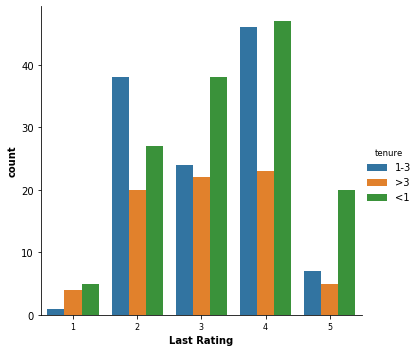

In [467]:
import matplotlib
matplotlib.rc('legend', fontsize=10, handlelength=2)
plt.figure(figsize=(30,20))
sns.catplot(x='Last Rating',hue='tenure',kind='count',data=data,legend=True)
plt.show()

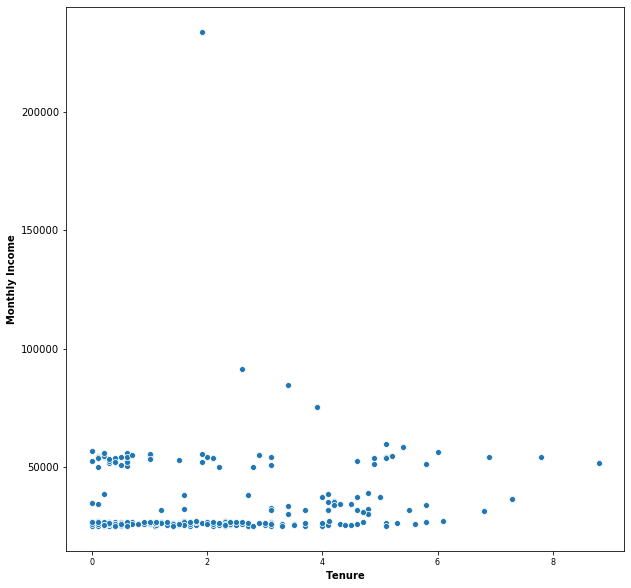

In [468]:
plt.figure(figsize=(10,10))

sns.scatterplot(data.Tenure,data['Monthly Income'])
plt.show()

In [469]:
s1=data['Monthly Income']
ind=s1.index[s1>65000]

In [470]:
data.iloc[ind,:]

,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,...,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks,remarks,tenure,% satifaction
81,XYZ2633,ABC82,02-09-2010,Zonal Manager,M4,Yes,HO Hyderabad,31-Aug-12,2.6,Male,...,45,2,91388,41,Married,HO,More Challenging Job Roles/ Higher designation,1.0,1-3,30-50
171,XYZ2231,ABC172,14-Dec-08,Zonal Manager,M4,Yes,HO,03-Oct-12,3.9,Male,...,42,3,75248,90,Single,HO,More Challenging Job Roles/ Higher designation,1.0,>3,70-90
196,XYZ2728,ABC197,22-Dec-10,National Sales Head,CXO,Yes,HO,09-Oct-12,1.9,Male,...,54,3,233954,45,Married,HO,More Challenging Job Roles/ Higher designation,1.0,1-3,30-50
308,XYZ2234,ABC309,10-Dec-09,Zonal Manager,M4,Yes,Chennai,15-Apr-13,3.4,Female,...,40,4,84759,85,Married,South,More Challenging Job Roles/ Higher designation,1.0,>3,70-90


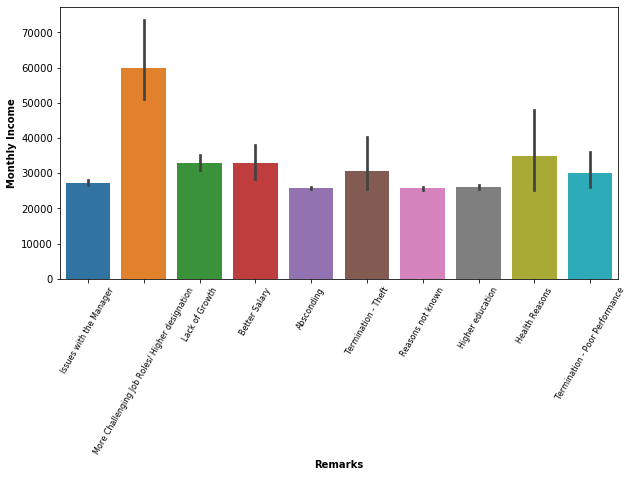

In [471]:
plt.figure(figsize=(10,5))

chart=sns.barplot(data['Remarks'],data['Monthly Income'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
plt.show()

In [472]:
## Best paid employees got better opportunities somewhere else.

In [473]:
data['Remarks'].value_counts()

Issues with the Manager                           145
Lack of Growth                                     96
More Challenging Job Roles/ Higher designation     31
Better Salary                                      19
Termination - Poor Performance                     13
Absconding                                          8
Termination - Theft                                 6
Health Reasons                                      4
Higher education                                    3
Reasons not known                                   2
Name: Remarks, dtype: int64

In [474]:
ind1 = data['Remarks'].index[data['Remarks']=='More Challenging Job Roles/ Higher designation']
data1=data.iloc[ind1,:]

In [475]:
data1.shape

(31, 21)

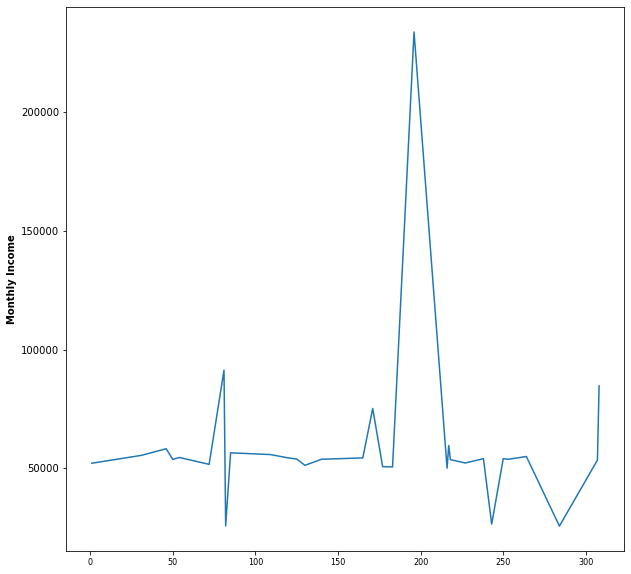

In [476]:
plt.figure(figsize=(10,10))
plt.ylabel('Monthly Income')
plt.plot(data1['Monthly Income'])

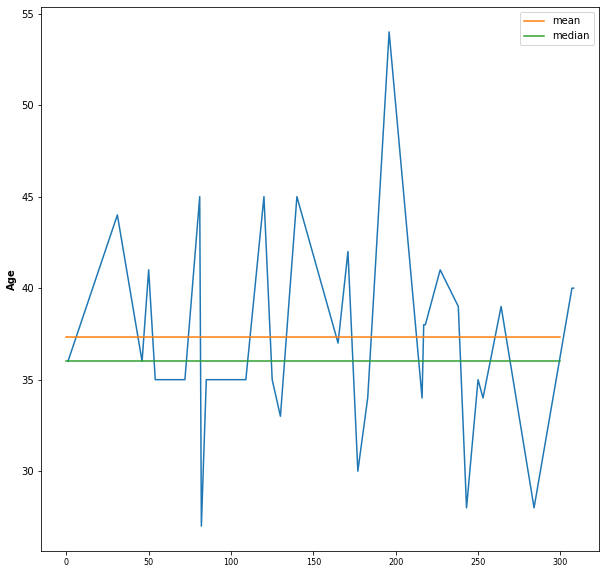

In [477]:
plt.figure(figsize=(10,10))
plt.ylabel('Age')
plt.plot(data1['Age'])
x=np.linspace(0,300)
y=data1['Age'].mean() + 0*x
plt.plot(x,y,label='mean')
x=np.linspace(0,300)
y=data1['Age'].median() + 0*x
plt.plot(x,y,label='median')

plt.legend()

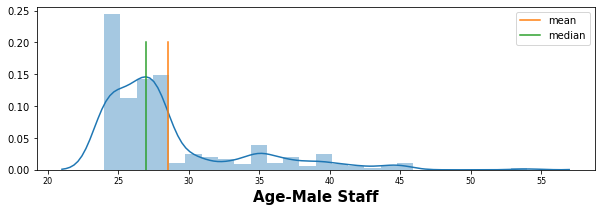

In [478]:
plt.figure(figsize=(10,3))
sns.distplot(data.Age[data.Age.index[data.Gender=='Male']],kde=True)
plt.xlabel('Age-Male Staff',fontsize=15)
y=np.linspace(0,0.2)
x=data.Age[data.Age.index[data.Gender=='Male']].mean() + 0*x
plt.plot(x,y,label='mean')
y=np.linspace(0,0.2)
x=data.Age[data.Age.index[data.Gender=='Male']].median() + 0*x
plt.plot(x,y,label='median')
plt.legend()

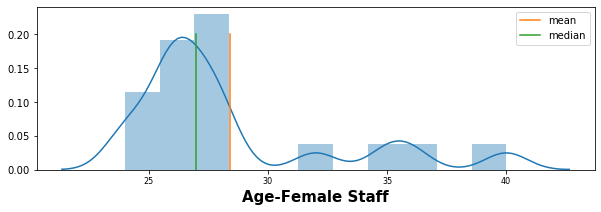

In [479]:
plt.figure(figsize=(10,3))
sns.distplot(data.Age[data.Age.index[data.Gender=='Female']],kde=True)
plt.xlabel('Age-Female Staff',fontsize=15)
y=np.linspace(0,0.2)
x=data.Age[data.Age.index[data.Gender=='Female']].mean() + 0*x
plt.plot(x,y,label='mean')
y=np.linspace(0,0.2)
x=data.Age[data.Age.index[data.Gender=='Female']].median() + 0*x
plt.plot(x,y,label='median')
plt.legend()

In [480]:
## Mostly young employees attrited(both male and female).

<Figure size 1440x1440 with 0 Axes>

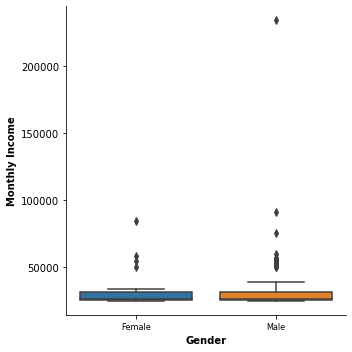

In [481]:
plt.figure(figsize=(20,20))
sns.catplot(data=data,x='Gender',y='Monthly Income',kind='box')

In [482]:
data2=data.drop([196])

<Figure size 1440x1440 with 0 Axes>

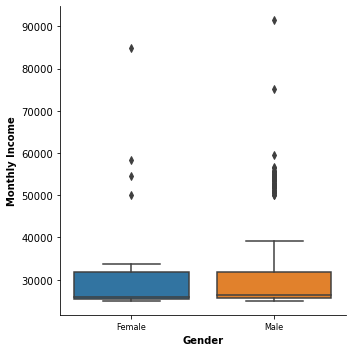

In [483]:
plt.figure(figsize=(20,20))
sns.catplot(data=data2,x='Gender',y='Monthly Income',kind='box').savefig('f3.png')

In [484]:
data.loc[:,['Gender','Monthly Income']].groupby('Gender').mean()

,Monthly Income
Gender,
Female,34227.944444
Male,32497.705502


<Figure size 1440x1440 with 0 Axes>

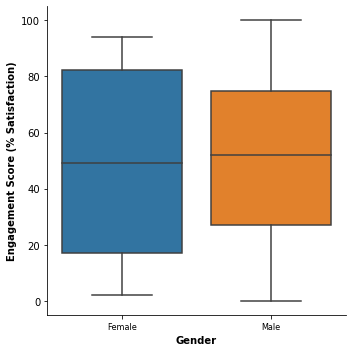

In [485]:
plt.figure(figsize=(20,20))
sns.catplot(data=data,x='Gender',y='Engagement Score (% Satisfaction)',kind='box').savefig('f4.png')
plt.show()

We note almost same average salary for men and women and this is attrition data.
Hence no unequal pay.Also almost same engagement score.
Possible explanation for low female staff attrition.

In [486]:
#let's see these 18 women.
dataf=data.iloc[data.index[data.Gender=='Female'],:]
dataf.Remarks.value_counts()

Issues with the Manager                           8
Lack of Growth                                    6
More Challenging Job Roles/ Higher designation    3
Better Salary                                     1
Name: Remarks, dtype: int64

In [487]:
dataf.Education.value_counts()

Bachelors    17
MBA           1
Name: Education, dtype: int64

In [488]:
## Let's see why the oldies attrited..
data.iloc[data.index[data.Age>40],:] ##only 13

,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,...,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks,remarks,tenure,% satifaction
31,XYZ2856,ABC32,20-Apr-11,Technical Services Officer,M2,Yes,Madurai,16-May-12,1,Male,...,44,3,55470,63,Divorced,South,More Challenging Job Roles/ Higher designation,1.0,<1,50-70
50,XYZ2430,ABC51,10-May-10,Technical Services Officer,M2,Yes,Koyambedu,19-Jun-12,2.1,Male,...,41,2,53762,0,Married,South,More Challenging Job Roles/ Higher designation,1.0,1-3,<=30
81,XYZ2633,ABC82,02-09-2010,Zonal Manager,M4,Yes,HO Hyderabad,31-Aug-12,2.6,Male,...,45,2,91388,41,Married,HO,More Challenging Job Roles/ Higher designation,1.0,1-3,30-50
120,XYZ0764,ABC121,12-03-2004,Technical Services Officer,M2,Yes,Trivandrum,09-Aug-12,7.8,Male,...,45,3,54381,66,Divorced,South,More Challenging Job Roles/ Higher designation,1.0,>3,50-70
140,XYZ3007,ABC141,01-Jul-12,Technical Services Officer,M2,Yes,Rajamundry,31-Aug-12,0.1,Male,...,45,4,53830,55,Married,South,More Challenging Job Roles/ Higher designation,1.0,<1,50-70
168,XYZ2833,ABC169,28-Mar-11,Technical Services Officer,M2,Yes,Bhavnagar,23-Sep-12,1.5,Male,...,45,4,52840,91,Married,West,Lack of Growth,2.0,1-3,>90
171,XYZ2231,ABC172,14-Dec-08,Zonal Manager,M4,Yes,HO,03-Oct-12,3.9,Male,...,42,3,75248,90,Single,HO,More Challenging Job Roles/ Higher designation,1.0,>3,70-90
175,XYZ3089,ABC176,22-Mar-12,Technical Services Officer,M2,Yes,Velachery,27-Sep-12,0.6,Male,...,41,4,55757,37,Married,South,Better Salary,3.0,<1,30-50
187,XYZ3091,ABC188,19-Mar-12,Technical Services Officer,M2,Yes,Vizag,30-Aug-12,0.5,Male,...,43,4,54292,8,Single,South,Lack of Growth,2.0,<1,<=30
190,XYZ3138,ABC191,21-May-12,Technical Services Officer,M2,Yes,Kolkata,01-Sep-12,0.3,Male,...,42,4,52341,82,Divorced,East,Lack of Growth,2.0,<1,70-90


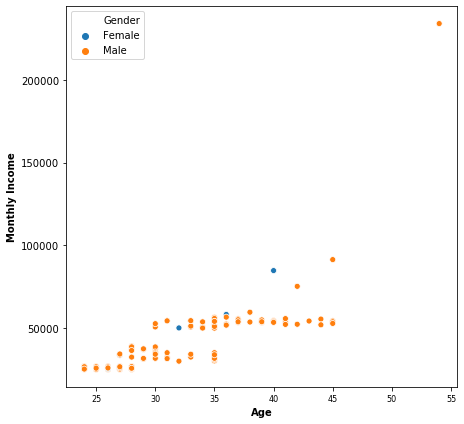

In [489]:
## All the oldies were decently paid(if 50k is considered to a mark for decent pay).
plt.figure(figsize=(7,7))
sns.scatterplot(data.Age,data['Monthly Income'],hue=data.Gender)

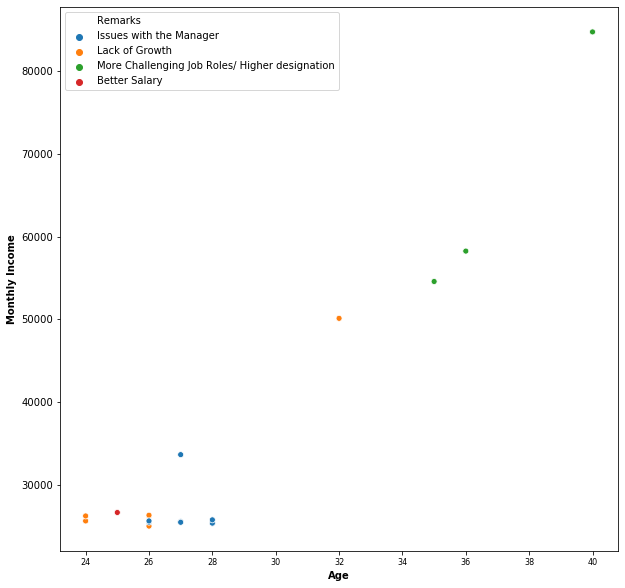

In [490]:
data3=data.iloc[data.index[data.Gender=='Female'],:]
plt.figure(figsize=(10,10))
sns.scatterplot(data3.Age,data3['Monthly Income'],hue=data3.Remarks)

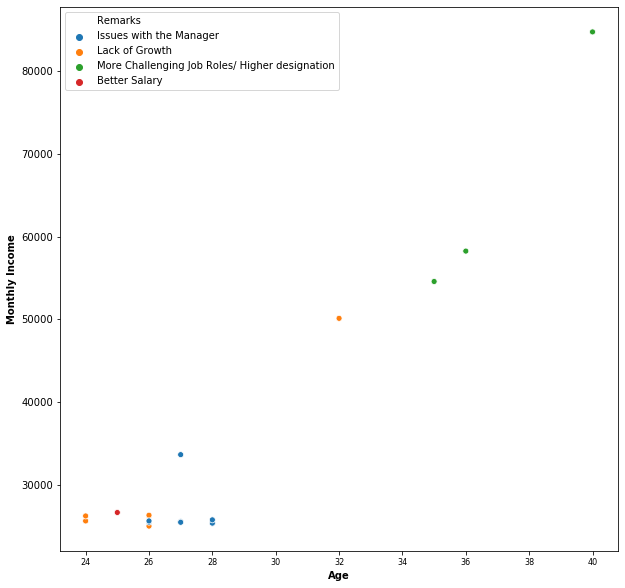

In [491]:
plt.figure(figsize=(10,10))
sns.scatterplot(data3.Age,data3['Monthly Income'],hue=data3.Remarks)

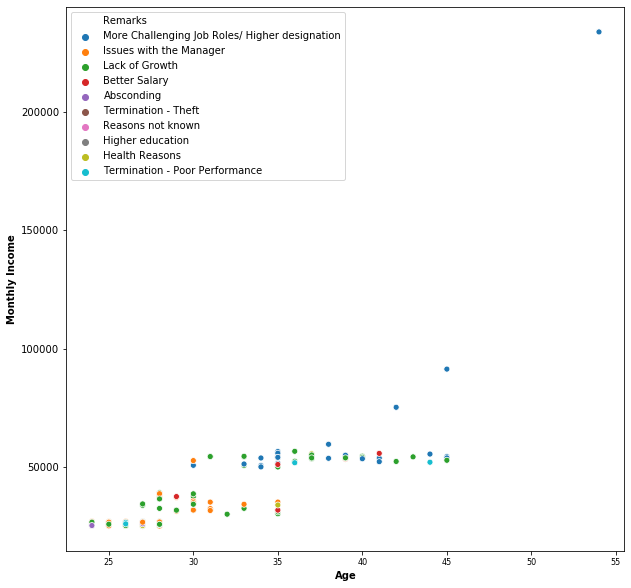

In [492]:
data4=data.iloc[data.index[data.Gender=='Male'],:]
plt.figure(figsize=(10,10))
sns.scatterplot(data4.Age,data4['Monthly Income'],hue=data4.Remarks)

In [493]:
## Generally young employees had 'issues with the manager'.

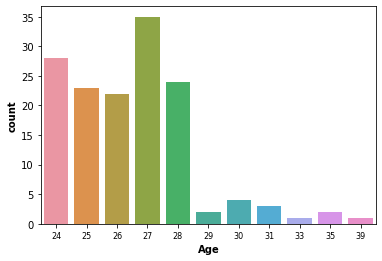

In [494]:
sns.countplot(data.iloc[data.index[data.remarks==0],:].Age)

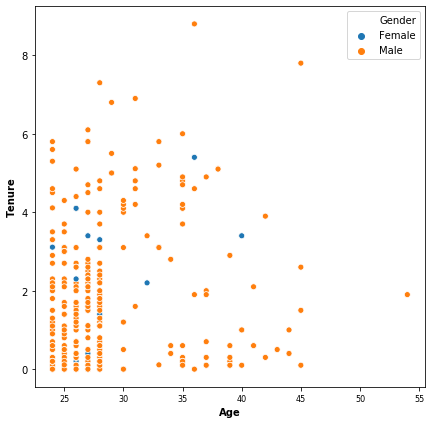

In [495]:
plt.figure(figsize=(7,7))
sns.scatterplot(data.Age,data.Tenure,hue=data.Gender)

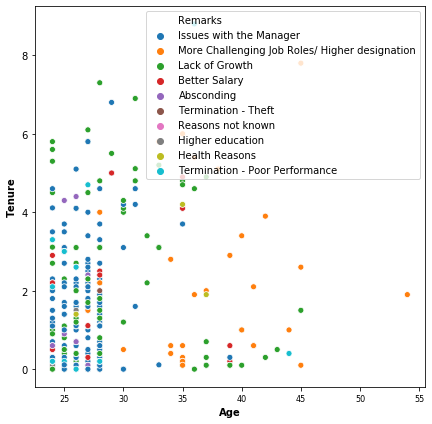

In [496]:
plt.figure(figsize=(7,7))
sns.scatterplot(data.Age,data.Tenure,hue=data.Remarks)

In [497]:
datar=data[(data.Remarks=='More Challenging Job Roles/ Higher designation') | (data.Remarks=='Lack of Growth') |(data.Remarks=='Better Salary')]

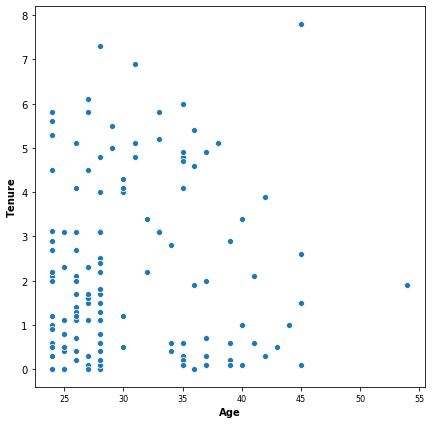

In [498]:
plt.figure(figsize=(7,7))
sns.scatterplot(datar.Age,datar.Tenure)

In [502]:
## Aged employees were hired with a good pay in the beggining itself.
## Company trusted aged people.

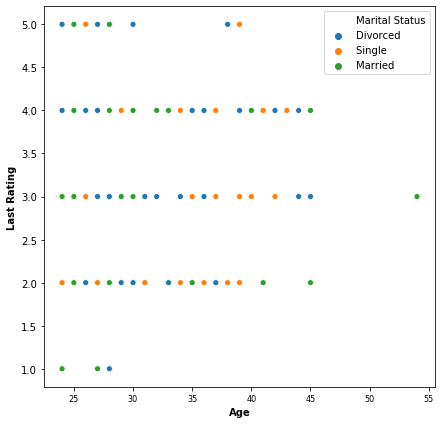

In [503]:
plt.figure(figsize=(7,7))
sns.scatterplot(data.Age,data['Last Rating'],hue=data['Marital Status'])

In [504]:
datah=data[(data['Last Rating']==4) | (data['Last Rating']==5)]

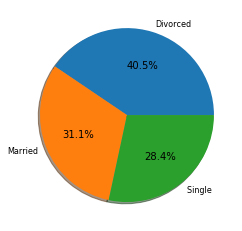

In [505]:
plt.pie(datah['Marital Status'].value_counts(),labels=datah['Marital Status'].value_counts().index ,shadow=True,autopct='%1.1f%%')
plt.show()

In [506]:
data.iloc[data.index[data.Designation=='Zonal Manager'],:]

,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,...,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks,remarks,tenure,% satifaction
81,XYZ2633,ABC82,02-09-2010,Zonal Manager,M4,Yes,HO Hyderabad,31-Aug-12,2.6,Male,...,45,2,91388,41,Married,HO,More Challenging Job Roles/ Higher designation,1.0,1-3,30-50
171,XYZ2231,ABC172,14-Dec-08,Zonal Manager,M4,Yes,HO,03-Oct-12,3.9,Male,...,42,3,75248,90,Single,HO,More Challenging Job Roles/ Higher designation,1.0,>3,70-90
308,XYZ2234,ABC309,10-Dec-09,Zonal Manager,M4,Yes,Chennai,15-Apr-13,3.4,Female,...,40,4,84759,85,Married,South,More Challenging Job Roles/ Higher designation,1.0,>3,70-90


In [507]:
data.Remarks.value_counts()

Issues with the Manager                           145
Lack of Growth                                     96
More Challenging Job Roles/ Higher designation     31
Better Salary                                      19
Termination - Poor Performance                     13
Absconding                                          8
Termination - Theft                                 6
Health Reasons                                      4
Higher education                                    3
Reasons not known                                   2
Name: Remarks, dtype: int64

In [508]:
data[data.Education=='MBA'].Remarks.value_counts()

More Challenging Job Roles/ Higher designation    13
Lack of Growth                                     4
Better Salary                                      1
Name: Remarks, dtype: int64

In [509]:
data[data.Education=='MBA'].Designation.value_counts()

Technical Services Officer    13
Regional Manager               2
Zonal Manager                  2
National Sales Head            1
Name: Designation, dtype: int64

<Figure size 1440x1440 with 0 Axes>

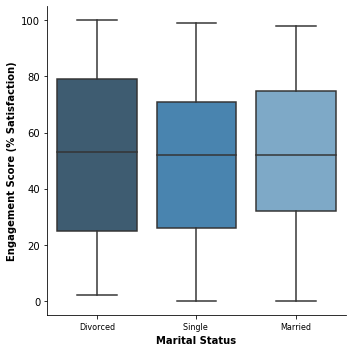

In [510]:
plt.figure(figsize=(20,20))
matplotlib.rc('legend',fontsize=10)
sns.catplot(data=data,x='Marital Status',y='Engagement Score (% Satisfaction)',kind='box',palette='Blues_d').savefig('f6.png')

#sns.catplot(data=data,x='Marital Status',y='Monthly Income',kind='bar',hue='Last Rating',palette='Blues_d')


In [511]:
## Non-Married staff got better ratings.

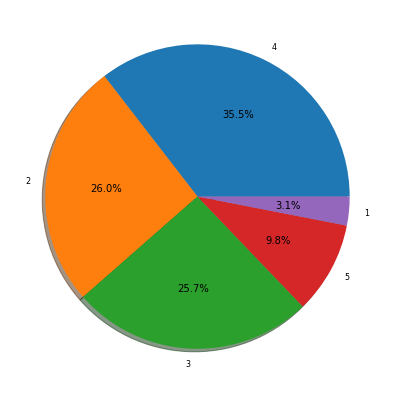

In [512]:
plt.figure(figsize=(7,7))
plt.pie(data['Last Rating'].value_counts(),labels=data['Last Rating'].value_counts().index ,shadow=True,autopct='%1.1f%%')
plt.show()

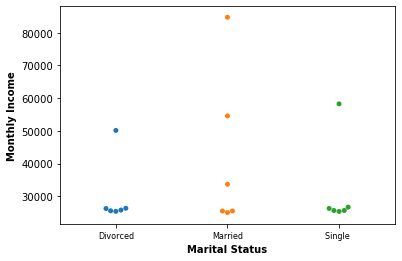

In [513]:
sns.swarmplot(dataf['Marital Status'],dataf['Monthly Income'])

In [524]:
s2=[]
for p in data['Age']:
    if(p<=30):s2.append('<=30')
    elif(p>30 and p<=40):s2.append('30-40')
    else:s2.append('>40')
data['age']=s2

In [530]:
datam=data.iloc[data.index[data.Gender=='Male'],:]

In [531]:
datam=datam.reset_index()

In [532]:
datam

,index,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,...,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks,remarks,tenure,% satifaction,age
0,1,XYZ2490,ABC2,5-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,6-Apr-12,1.9,...,2,52155,45,Single,South,More Challenging Job Roles/ Higher designation,1.0,1-3,30-50,30-40
1,2,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,7-Apr-12,1.5,...,4,26438,18,Divorced,CENTRAL,Issues with the Manager,0.0,1-3,<=30,<=30
2,3,XYZ1679,ABC4,01-May-08,AM - Sales,M1,Yes,Admin Gujarat,03-Apr-12,3.11,...,2,54311,82,Single,West,Lack of Growth,2.0,>3,70-90,30-40
3,4,XYZ2378,ABC5,03-Mar-10,Sales Executive,E1,Yes,Jagdishpuram,10-Apr-12,2.1,...,4,26702,49,Divorced,North,Issues with the Manager,0.0,1-3,30-50,<=30
4,5,XYZ3009,ABC6,17-Nov-11,Sales Executive,E1,Yes,Lalganj,09-Apr-12,0.4,...,4,26291,81,Single,North,Better Salary,3.0,<=1,70-90,<=30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,322,XYZ1538,ABC323,26-May-08,AM - Sales,M1,Yes,Guntur,15-Mar-13,4.9,...,2,53841,69,Divorced,South,Lack of Growth,2.0,>3,50-70,30-40
305,323,XYZ3221,ABC324,13-Sep-12,Sales Executive,E1,Yes,Guntur,07-Mar-13,0.5,...,3,25813,11,Married,South,Lack of Growth,2.0,<=1,<=30,<=30
306,324,XYZ0207,ABC325,12-Dec-05,Sr Sales Executive,E2,Yes,Guntur,12-Mar-13,7.3,...,1,36498,11,Divorced,South,Lack of Growth,2.0,>3,<=30,<=30
307,325,XYZ0183,ABC326,21-Jul-04,AM - Sales,M1,Yes,Guntur,31-Mar-13,8.8,...,3,51796,82,Divorced,South,Termination - Poor Performance,9.0,>3,70-90,30-40


In [533]:
datam.iloc[datam.index[datam['Age']>50],:]

,index,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,...,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks,remarks,tenure,% satifaction,age
183,196,XYZ2728,ABC197,22-Dec-10,National Sales Head,CXO,Yes,HO,09-Oct-12,1.9,...,3,233954,45,Married,HO,More Challenging Job Roles/ Higher designation,1.0,1-3,30-50,>40


In [534]:
datam=datam.drop([183])

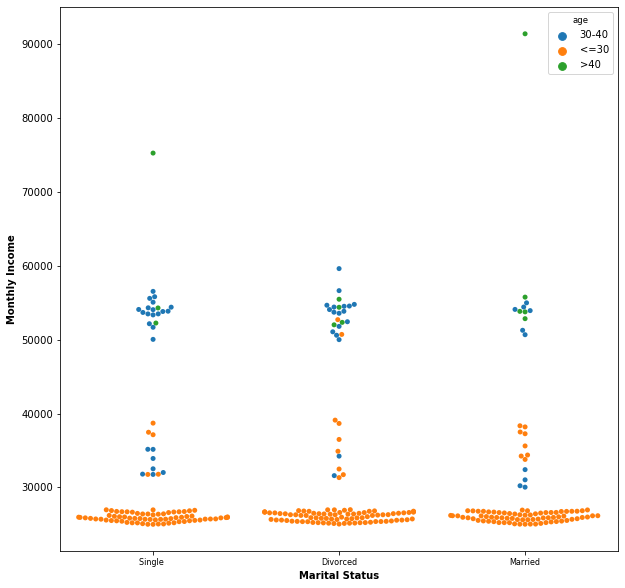

In [535]:
plt.figure(figsize=(10,10))
sns.swarmplot(datam['Marital Status'],datam['Monthly Income'],hue=datam['age'])

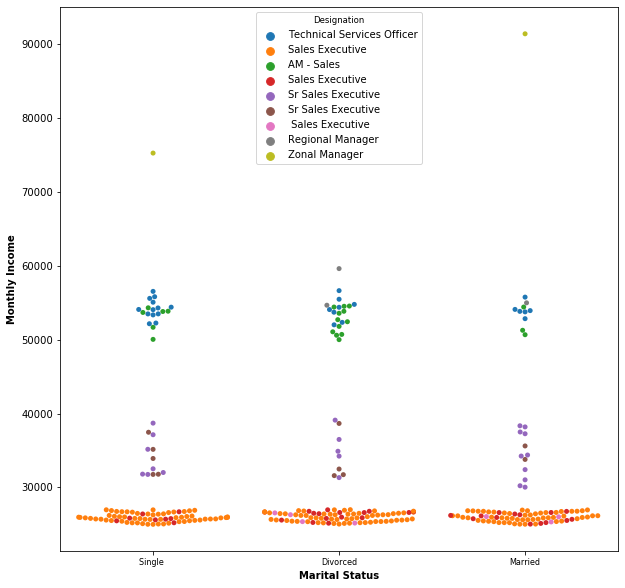

In [536]:
plt.figure(figsize=(10,10))
sns.swarmplot(datam['Marital Status'],datam['Monthly Income'],hue=datam['Designation'])

In [537]:
## Hierarchy in designation <=> Hierarchy in pay <=> Age  All three go hand in hand.
## Attrition decreases up the hierarchy.

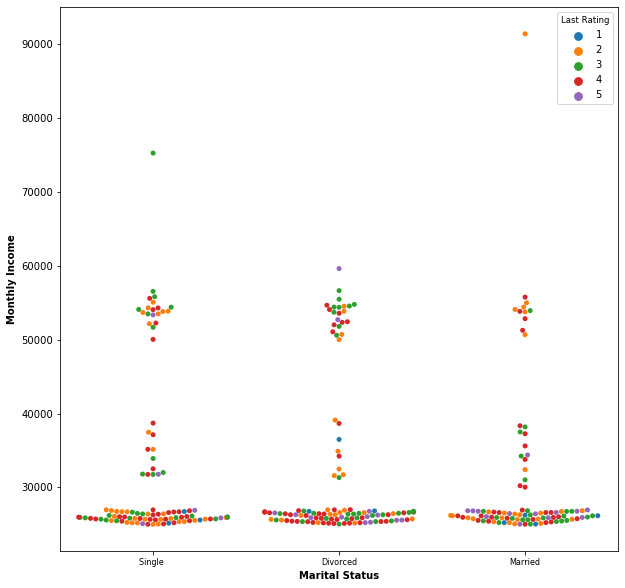

In [538]:
plt.figure(figsize=(10,10))
sns.swarmplot(datam['Marital Status'],datam['Monthly Income'],hue=datam['Last Rating'])

<Figure size 1440x14400 with 0 Axes>

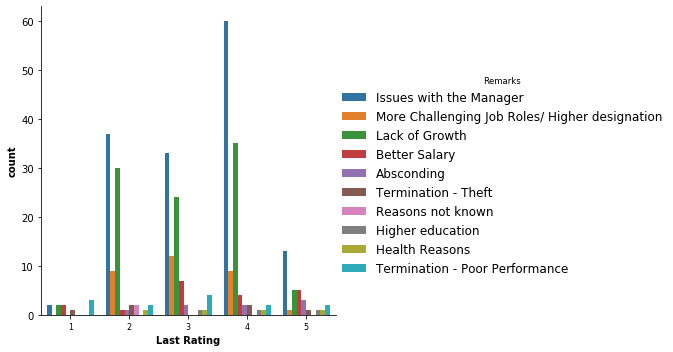

In [539]:
plt.figure(figsize=(20,200))
matplotlib.rc('legend', fontsize=12)
chart=sns.catplot(data=data,x='Last Rating',kind='count',hue='Remarks')
plt.show()

In [540]:
data.index[data.Designation=='Zonal Manager']

Int64Index([81, 171, 308], dtype='int64')

In [541]:
data.iloc[data.index[data.Designation=='Zonal Manager'],:]

,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,...,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks,remarks,tenure,% satifaction,age
81,XYZ2633,ABC82,02-09-2010,Zonal Manager,M4,Yes,HO Hyderabad,31-Aug-12,2.6,Male,...,2,91388,41,Married,HO,More Challenging Job Roles/ Higher designation,1.0,1-3,30-50,>40
171,XYZ2231,ABC172,14-Dec-08,Zonal Manager,M4,Yes,HO,03-Oct-12,3.9,Male,...,3,75248,90,Single,HO,More Challenging Job Roles/ Higher designation,1.0,>3,70-90,>40
308,XYZ2234,ABC309,10-Dec-09,Zonal Manager,M4,Yes,Chennai,15-Apr-13,3.4,Female,...,4,84759,85,Married,South,More Challenging Job Roles/ Higher designation,1.0,>3,70-90,30-40


In [542]:
data.iloc[data.index[data.Location=='HO'],:]

,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,...,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks,remarks,tenure,% satifaction,age
171,XYZ2231,ABC172,14-Dec-08,Zonal Manager,M4,Yes,HO,03-Oct-12,3.9,Male,...,3,75248,90,Single,HO,More Challenging Job Roles/ Higher designation,1.0,>3,70-90,>40
184,XYZ2940,ABC185,11-Jul-11,Sr Sales Executive,E2,Yes,HO,17-Sep-12,1.2,Male,...,4,31766,32,Single,HO,Lack of Growth,2.0,1-3,30-50,<=30
196,XYZ2728,ABC197,22-Dec-10,National Sales Head,CXO,Yes,HO,09-Oct-12,1.9,Male,...,3,233954,45,Married,HO,More Challenging Job Roles/ Higher designation,1.0,1-3,30-50,>40
217,XYZ0620,ABC218,24-Oct-06,Regional Manager,M3,Yes,HO,23-Oct-12,5.11,Male,...,5,59615,25,Divorced,HO,More Challenging Job Roles/ Higher designation,1.0,>3,<=30,30-40
253,XYZ0054,ABC254,4-Aug-12,AM - Sales,M1,Yes,HO,31-Dec-12,0.4,Male,...,2,53811,14,Single,HO,More Challenging Job Roles/ Higher designation,1.0,<=1,<=30,30-40
254,XYZ2731,ABC255,23-Dec-10,Sales Executive,E1,Yes,HO,29-Dec-12,2,Male,...,2,26100,77,Single,HO,Lack of Growth,2.0,1-3,70-90,<=30
269,XYZ3321,ABC270,27-Dec-12,AM - Sales,M1,Yes,HO,07-Jan-13,0,Male,...,5,52708,60,Divorced,HO,Issues with the Manager,0.0,<=1,50-70,<=30


In [543]:
s3=data['In Active Date']
la=[]
for item in s3:
    la.append(''.join([i for i in item if not i.isdigit()])) 

In [544]:
data['Month of Attrition']=la

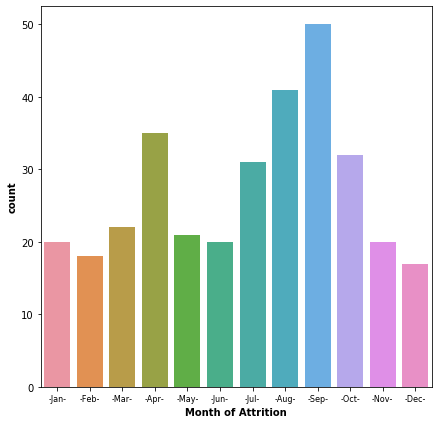

In [545]:
plt.figure(figsize=(7,7))
order=['-Jan-','-Feb-','-Mar-','-Apr-','-May-','-Jun-','-Jul-','-Aug-','-Sep-','-Oct-','-Nov-','-Dec-']
plt.xlabel('Month of Attrition')
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
chart=sns.countplot(data['Month of Attrition'],order=order).get_figure().savefig('fig2.png')

In [547]:
data.iloc[data.index[data['Month of Attrition']=='-Aug-'],:].Remarks.value_counts()

Issues with the Manager                           20
Lack of Growth                                    15
More Challenging Job Roles/ Higher designation     4
Absconding                                         1
Better Salary                                      1
Name: Remarks, dtype: int64

In [550]:
data.iloc[data.index[data['Month of Attrition']=='-Apr-'],:].Remarks.value_counts()

Lack of Growth                                    15
Issues with the Manager                           12
Better Salary                                      3
More Challenging Job Roles/ Higher designation     3
Reasons not known                                  1
Absconding                                         1
Name: Remarks, dtype: int64

In [551]:
for i in range(len(data.Zone)) :
    data.Zone[i] = data.Zone[i].lower()

C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [552]:
data.Zone.value_counts()

south      100
north       72
east        58
west        51
central     29
ho          17
Name: Zone, dtype: int64

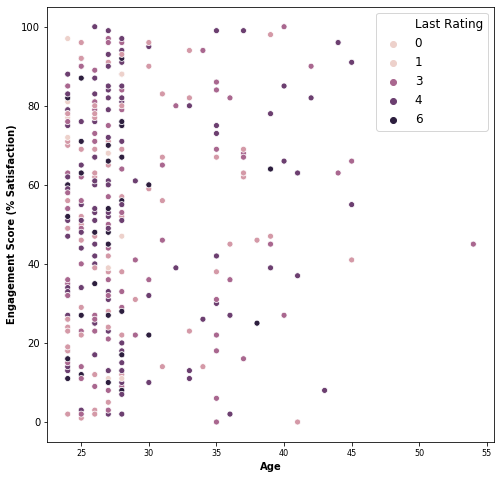

In [553]:
plt.figure(figsize=(8,8))
sns.scatterplot(data.Age,data['Engagement Score (% Satisfaction)'],hue=data['Last Rating'])

Almost uniform satisfaction distributon at every Age.

In [554]:
data['Last Rating'].value_counts()

4    116
2     85
3     84
5     32
1     10
Name: Last Rating, dtype: int64

In [555]:
datas=data[data.Designation=='Sales Executive']
datas.shape

(187, 23)

In [556]:
datas.Remarks.value_counts()

Issues with the Manager                           99
Lack of Growth                                    49
Better Salary                                     11
Termination - Poor Performance                     9
Absconding                                         7
Termination - Theft                                4
More Challenging Job Roles/ Higher designation     3
Higher education                                   2
Health Reasons                                     2
Reasons not known                                  1
Name: Remarks, dtype: int64

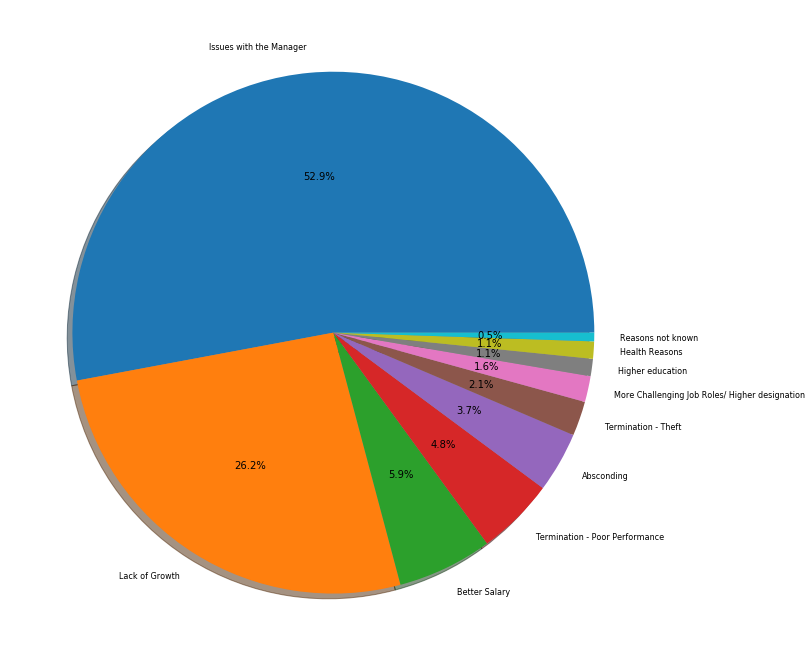

In [557]:
plt.figure(figsize=(12,12))
plt.pie(datas['Remarks'].value_counts(),labels=datas['Remarks'].value_counts().index ,shadow=True,autopct='%1.1f%%')
plt.show()

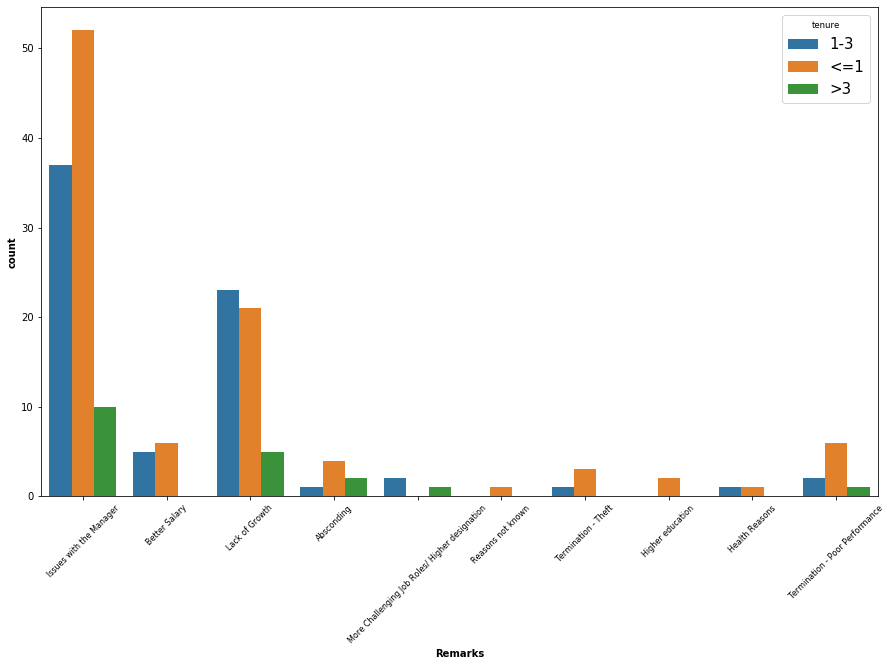

In [558]:
plt.figure(figsize=(15,9))
matplotlib.rc('legend',fontsize=15)
chart=sns.countplot(datas.Remarks,hue=datas['tenure'])
chart.set_xticklabels(labels=chart.get_xticklabels(),rotation=45)
plt.show()

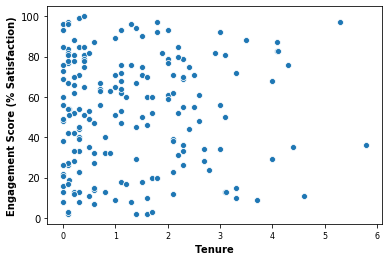

In [559]:
sns.scatterplot(datas.Tenure,datas['Engagement Score (% Satisfaction)'])

In [560]:
data11=data.loc[:,['Remarks','Region']]

C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [561]:
data11.

SyntaxError: invalid syntax (<ipython-input-561-e9b083b808d8>, line 1)

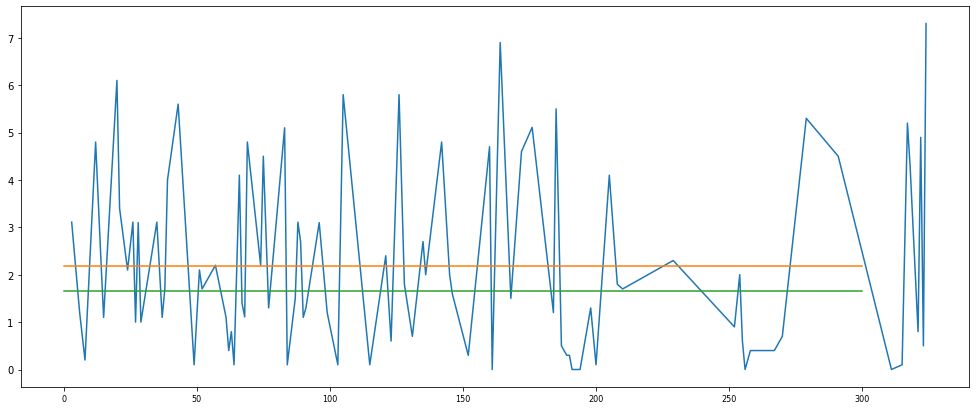

In [562]:
plt.figure(figsize=(17,7))
plt.plot(data[data.Remarks=='Lack of Growth'].Tenure)
x=np.linspace(0,300)
y=data[data.Remarks=='Lack of Growth'].Tenure.mean() + 0*x
plt.plot(x,y)
x=np.linspace(0,300)
y=data[data.Remarks=='Lack of Growth'].Tenure.median() + 0*x
plt.plot(x,y)
plt.show()

Wait and Watch Policy

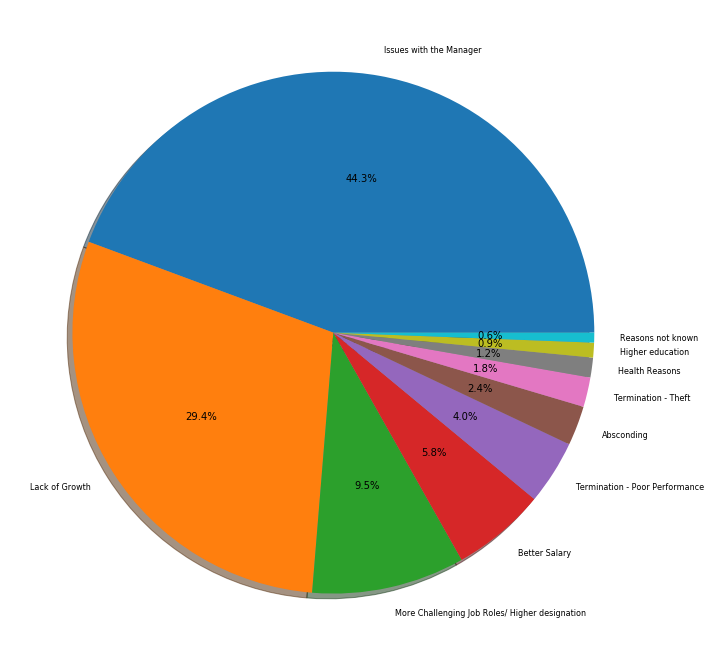

In [563]:
plt.figure(figsize=(12,12))
plt.pie(data['Remarks'].value_counts(),labels=data['Remarks'].value_counts().index ,shadow=True,autopct='%1.1f%%')
plt.show()

In [564]:
data11=data.loc[:,['Remarks','Zone']]

In [565]:
data11.shape

(327, 2)

In [566]:
len(data11.Zone)

327

In [567]:
n=[]
s=[]
e=[]
w=[]
c=[]
ho=[]

In [568]:
for item in data11.Zone:
    if(item=='north'):
        n.append(1)
        s.append(0)
        e.append(0)
        w.append(0)
        c.append(0)
        ho.append(0)
        continue
    if(item=='south'):
        n.append(0)
        s.append(1)
        e.append(0)
        w.append(0)
        c.append(0)
        ho.append(0)
        continue
    if(item=='east'):
        n.append(0)
        s.append(0)
        e.append(1)
        w.append(0)
        c.append(0)
        ho.append(0)
        continue
    if(item=='west'):
        n.append(0)
        s.append(0)
        e.append(0)
        w.append(1)
        c.append(0)
        ho.append(0)
        continue
    if(item=='central'):
        n.append(0)
        s.append(0)
        e.append(0)
        w.append(0)
        c.append(1)
        ho.append(0)
        continue
    else:
        n.append(0)
        s.append(0)
        e.append(0)
        w.append(0)
        c.append(0)
        ho.append(1)
        continue

In [569]:
len(ho)

327

In [570]:
data11['north']=n
data11['south']=s
data11['east']=e
data11['west']=w
data11['central']=c
data11['HO']=ho

In [571]:
data11

,Remarks,Zone,north,south,east,west,central,HO
0,Issues with the Manager,west,0,0,0,1,0,0
1,More Challenging Job Roles/ Higher designation,south,0,1,0,0,0,0
2,Issues with the Manager,central,0,0,0,0,1,0
3,Lack of Growth,west,0,0,0,1,0,0
4,Issues with the Manager,north,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
322,Lack of Growth,south,0,1,0,0,0,0
323,Lack of Growth,south,0,1,0,0,0,0
324,Lack of Growth,south,0,1,0,0,0,0
325,Termination - Poor Performance,south,0,1,0,0,0,0


In [572]:
data11.groupby('Remarks').sum()

,north,south,east,west,central,HO
Remarks,,,,,,
Absconding,3,1,1,2,1,0
Better Salary,6,13,0,0,0,0
Health Reasons,0,2,1,1,0,0
Higher education,0,1,0,0,2,0
Issues with the Manager,38,38,32,21,13,3
Lack of Growth,18,27,18,22,7,4
More Challenging Job Roles/ Higher designation,4,12,1,3,2,9
Reasons not known,0,0,1,0,1,0
Termination - Poor Performance,2,5,3,2,1,0


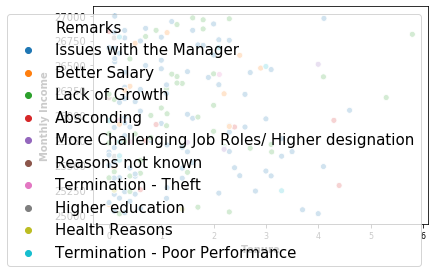

In [573]:
sns.scatterplot(datas['Tenure'],datas['Monthly Income'],hue=datas.Remarks)

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

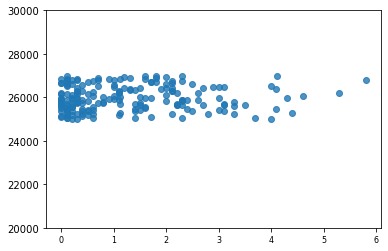

In [574]:
plt.ylim(20000,30000)
chart=sns.regplot(datas['Tenure'],datas['Monthly Income']).get_figure().savefig('fig1.png')

In [ ]:
plt.figure(figsize=(10,10))
sns.swarmplot(x=data[data.Designation=='Technical Services Officer'].Education,y=data[data.Designation=='Technical Services Officer'].Tenure)

In [ ]:
data=data[(data.Remarks=='Issues with the Manager') | (data.Remarks=='More Challenging Job Roles/ Higher designation') | (data.Remarks=='Lack of Growth') | (data.Remarks=='Better Salary') ]

In [575]:
datasq=data.drop(data.index[data.Remarks=='Issues with the Manager'])

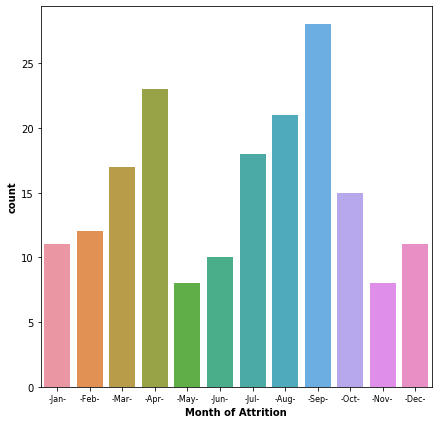

In [576]:
plt.figure(figsize=(7,7))
order=['-Jan-','-Feb-','-Mar-','-Apr-','-May-','-Jun-','-Jul-','-Aug-','-Sep-','-Oct-','-Nov-','-Dec-']
plt.xlabel('Month of Attrition')
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
chart=sns.countplot(datasq['Month of Attrition'],order=order)

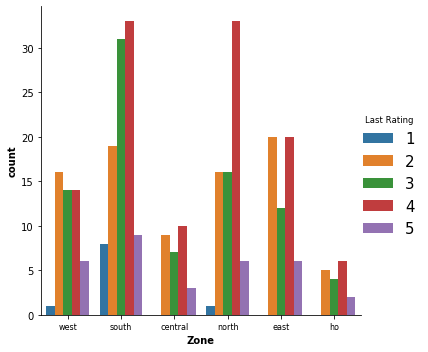

In [577]:
sns.catplot(data=data,x='Zone',kind='count',hue='Last Rating')
plt.show()

In [578]:
dataw=data[((data.Zone=='south') | (data.Zone=='north')) & ((data['Last Rating']==4) | (data['Last Rating']==5)) & (data.Tenure>2)]


In [579]:
dataw.Remarks.value_counts()

Issues with the Manager                           10
Lack of Growth                                     8
Better Salary                                      4
Absconding                                         2
More Challenging Job Roles/ Higher designation     2
Termination - Poor Performance                     1
Name: Remarks, dtype: int64

In [580]:
data.loc[:,['Gender','Last Rating']].groupby('Gender').mean()

,Last Rating
Gender,
Female,3.333333
Male,3.223301


In [582]:
data[data.Zone=='ho'].Designation.value_counts()

Regional Manager       5
Sr Sales Executive     4
AM - Sales             3
Sales Executive        2
Zonal Manager          2
National Sales Head    1
Name: Designation, dtype: int64